In [1]:
import pandas as pd
from data_preprocessing import BOC_init

boc, x, y = BOC_init() 
    
def get_container_id(cell_specimen_id):
    """This function takes a cell specimen id and returns the experiment container it is in"""
    selectivity_S_df = x
    cell_record=selectivity_S_df.loc[selectivity_S_df['cell_specimen_id']==cell_specimen_id]
    exp_container_id=cell_record.iloc[0]['experiment_container_id']
    return(exp_container_id)

def get_session_id(exp_container_id, letter):
    sessiontype=['three_session_'+str(letter)]
    session_data=pd.DataFrame(boc.get_ophys_experiments(experiment_container_ids=[exp_container_id], session_types=sessiontype))
    session_id=session_data['id'][0]
    return(session_id, session_data)

# In[]
#this section is a testing section. for cell_specimen_id  517510587, 
#get_container_id should return 511510855 
#get_session_id should return 510705057 (for session B)  
#if __name__ == '__main__' :    
#    exp_container_id = get_container_id(517510587)
#    print(exp_container_id)
#    print(get_session_id(exp_container_id, 'B'))
    
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
drive_path='d:'
manifest_path = os.path.join(drive_path,'BrainObservatory/manifest.json')
boc = BrainObservatoryCache(manifest_file=manifest_path)


def open_h5_file(cell_specimen_id, drive_path, letter):
    exp_container_id = get_container_id(cell_specimen_id)
    session_id, session_data = get_session_id(exp_container_id, letter)
    path = drive_path + '/BrainObservatory/ophys_analysis/' + str(session_id) + '_three_session_B_analysis.h5'
    f = h5py.File(path, 'r')
    response = f['analysis']['response_ns'].value
    f.close()
    mean_sweep_response=pd.read_hdf(path, 'analysis/mean_sweep_response_ns')
    sweep_response = pd.read_hdf(path, 'analysis/sweep_response_ns')
    return(response, mean_sweep_response, sweep_response, exp_container_id, session_id, session_data)

def hist_single_cell(cell_specimen_id, drive_path, letter, bins):
    response, mean_sweep_response, sweep_response, exp_container_id, session_id, session_data = open_h5_file(cell_specimen_id, drive_path, letter)
    data_set = boc.get_ophys_experiment_data(ophys_experiment_id = session_data.id.values[0])
    cell_specimen_ids = data_set.get_cell_specimen_ids()    
    cell_idx=np.where(cell_specimen_ids==cell_specimen_id)[0][0]
    cell_series = mean_sweep_response.iloc[:, cell_idx]     
    plt.hist(cell_series, bins=bins)

# In[]
#this is test code. Should return a histogram that looks like a nice histogram with a long tail.
#if __name__ == '__main__' : 
#    print(hist_single_cell(517510587, 'd:', 'B', 1000)) 

None


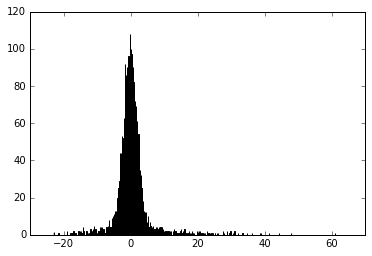

In [3]:
%matplotlib inline
print(hist_single_cell(517510587, 'd:', 'B', 1000)) 